## Sequence spectra

In [1]:
# Import auxiliary libraries for demonstration

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings

plt.rcParams[ "figure.figsize" ] = [ 5, 4 ]

plt.rcParams[ "figure.dpi" ] = 80
plt.rcParams[ "font.family" ] = "Times New Roman"
plt.rcParams[ "font.size" ] = '14'

# Filter the plot warning
warnings.filterwarnings( "ignore" )

# Numpy random seed
np.random.seed(0)

###  Periodogram spectrum

Function `periodogramSpectrum` transforms the sequence data to its power spectral density with the `scipy.signal.periodogram`.

#### Function help

In [2]:
from ffpack.lsm import periodogramSpectrum
help( periodogramSpectrum )

Help on function periodogramSpectrum in module ffpack.lsm.sequenceSpectra:

periodogramSpectrum(data, fs)
    Power spectral density with `scipy.signal.periodogram`.
    
    Parameters
    ----------
    data: 1darray
        Sequence to calculate power spectral density.
    fs: scalar
        Sampling frequency.
    
    Returns
    -------
    freq: 1darray
        frequency components.
    psd: 1darray
        Power spectral density. 
    
    Raises
    ------
    ValueError
        If data is not a 1darray.
        If fs is not a scalar.
    
    Examples
    --------
    >>> from ffpack.lsm import periodogramSpectrum
    >>> data = [ 2, 5, 3, 6, 2, 4, 1, 6, 1, 3, 1, 5, 3, 6, 3, 6, 4, 5, 2 ]
    >>> fs = 2
    >>> freq, psd = periodogramSpectrum( data, fs )



#### Example with generated data

In [3]:
gfs = 1000  # 1kHz sampling frequency
fs1 = 10    # first signal component at 10 Hz
fs2 = 60    # second signal component at 60 Hz
T = 10      # 10s signal length
n0 = -10    # noise level (dB)

In [4]:
t = np.r_[ 0: T: ( 1 / gfs ) ]  # sample time
gdata = np.sin( 2 * fs1 * np.pi * t ) + np.sin( 2 * fs2 * np.pi * t ) 

# white noise with power n0
gdata += np.random.randn( len( gdata ) ) * 10**( n0 / 20.0 ) 

In [5]:
gfreq, gpsd = periodogramSpectrum( gdata, gfs )

In [6]:
ind = np.argpartition( gpsd, -2 )[ -2: ]
peak1 = min( gfreq[ ind ] )
peak2 = max( gfreq[ ind ] )
print( [ peak1, peak2 ] )

[10.0, 60.0]


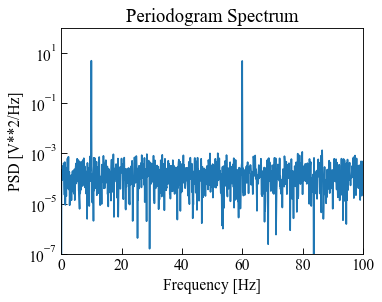

In [7]:
fig, ax = plt.subplots()
plt.yscale("log")

ax.semilogy( np.array( gfreq ),
             np.array( gpsd ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.tick_params(axis='x', direction="in", length=3, which='minor')
ax.tick_params(axis='y', direction="in", length=3, which='minor')

ax.set_ylim( [ 1e-7, 1e2 ] )
ax.set_xlim( [ 0, 100 ] )

ax.set_xlabel( "Frequency [Hz]" )
ax.set_ylabel( "PSD [V**2/Hz]" )
ax.set_title( "Periodogram Spectrum" )

plt.tight_layout()
plt.show()

###  Welch spectrum

Function `welchSpectrum` transforms the sequence data to its power spectral density with the `scipy.signal.welch`.

#### Function help

In [8]:
from ffpack.lsm import welchSpectrum
help( welchSpectrum )

Help on function welchSpectrum in module ffpack.lsm.sequenceSpectra:

welchSpectrum(data, fs, nperseg=1024)
    Power spectral density with `scipy.signal.welch`.
    
    Parameters
    ----------
    data: 1darray
        Sequence to calculate power spectral density.
    fs: scalar
        Sampling frequency.
    nperseg: scalar
        Length of each segment. Defaults to 1024.
    
    Returns
    -------
    freq: 1darray
        frequency components.
    psd: 1darray
        Power spectral density. 
    
    Raises
    ------
    ValueError
        If data is not a 1darray.
        If fs is not a scalar.
    
    Examples
    --------
    >>> from ffpack.lsm import welchSpectrum
    >>> data = [ 2, 5, 3, 6, 2, 4, 1, 6, 1, 3, 1, 5, 3, 6, 3, 6, 4, 5, 2 ]
    >>> fs = 2
    >>> freq, psd = welchSpectrum( data, fs, nperseg=1024 )



#### Example with default values

In [9]:
gfs = 1000  # 1kHz sampling frequency
fs1 = 10    # first signal component at 10 Hz
fs2 = 60    # second signal component at 60 Hz
T = 10      # 10s signal length
n0 = -10    # noise level (dB)

In [10]:
t = np.r_[ 0: T: ( 1 / gfs ) ]  # sample time
gdata = np.sin( 2 * fs1 * np.pi * t ) + np.sin( 2 * fs2 * np.pi * t ) 

# white noise with power n0
gdata += np.random.randn( len( gdata ) ) * 10**( n0 / 20.0 ) 

In [11]:
gfreq, gpsd = welchSpectrum( gdata, gfs )

In [12]:
ind = np.argpartition( gpsd, -2 )[ -2: ]
peak1 = min( gfreq[ ind ] )
peak2 = max( gfreq[ ind ] )
print( [ peak1, peak2 ] )

[9.765625, 59.5703125]


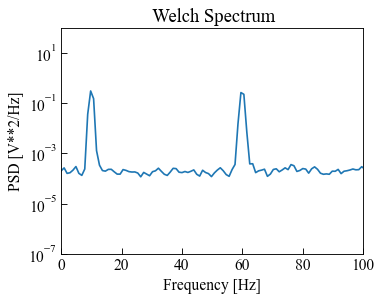

In [13]:
fig, ax = plt.subplots()
plt.yscale("log")

ax.semilogy( np.array( gfreq ),
             np.array( gpsd ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.tick_params(axis='x', direction="in", length=3, which='minor')
ax.tick_params(axis='y', direction="in", length=3, which='minor')

ax.set_ylim( [ 1e-7, 1e2 ] )
ax.set_xlim( [ 0, 100 ] )

ax.set_xlabel( "Frequency [Hz]" )
ax.set_ylabel( "PSD [V**2/Hz]" )
ax.set_title( " Welch Spectrum" )

plt.tight_layout()
plt.show()